# LendingClub Loan Data Classification using Artificial Neural Network (ANN)

In this notebook, we will be tackling classification problem involving the LendingClub Loan Dataset. 
We will try to classify which user will pay the loan and not pay the loan using Artifical Neural Networks (ANNs).

 
There will be 4 main parts in this notebooks, which is:
- Data Overview 
- Exploratory Data Analysis
- Data Cleaning
- Feature Engineering
- Model Evaluation
 
This is my solo second project so critics and advice are welcome!
Thank you!

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

# Data Overview

In [2]:
loan = pd.read_csv('lending_club_loan_two.csv')
data_info = pd.read_csv('lending_club_info.csv')

In [3]:
# Creating a function to easily access the description of each column in loan_data

def desc_info(column):
    return(print(data_info['Description'][data_info['LoanStatNew'] == column].values[0]))

In [4]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
loan.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


# Exploratory Data Analysis

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


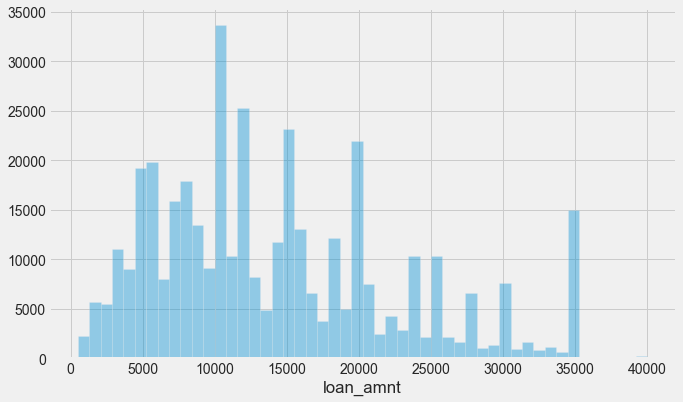

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(loan['loan_amnt'], bins = 50, kde = False)
plt.show()

<AxesSubplot:>

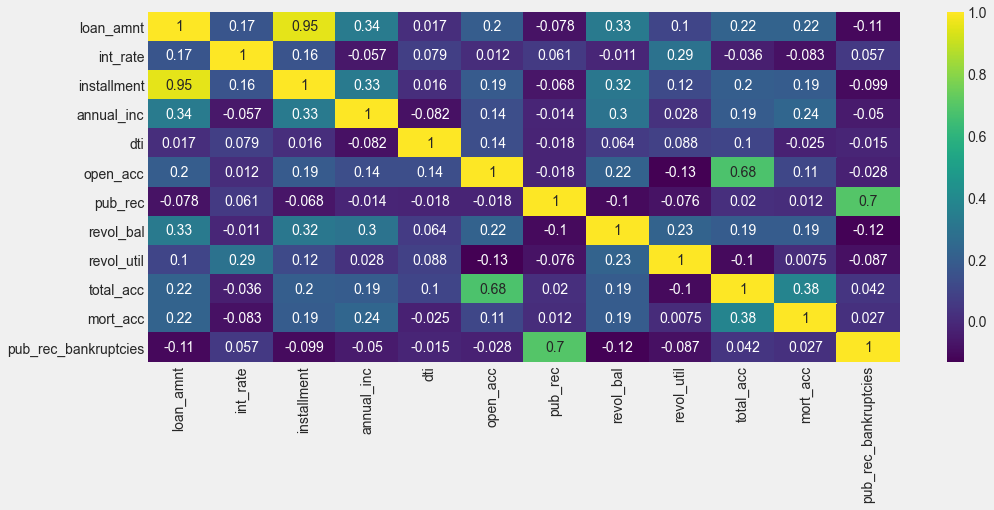

In [8]:
plt.figure(figsize=(15,6))
sns.heatmap(loan.corr(), annot = True, cmap = 'viridis')

# Based on the heatmap, we can see that there is a high correlation between loan_amnt and installment.
# It is good to explore those 2 correlation further.

In [9]:
print('installment :')
desc_info('installment')
print('\n')
print('loan_amount :')
desc_info('loan_amnt')

installment :
The monthly payment owed by the borrower if the loan originates.


loan_amount :
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

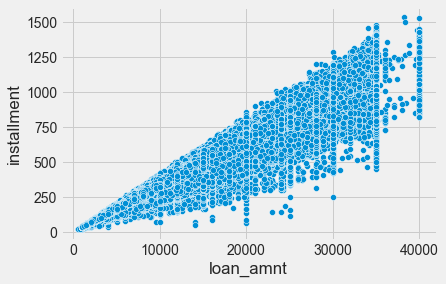

In [10]:
sns.scatterplot(x = 'loan_amnt',y='installment',data = loan)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

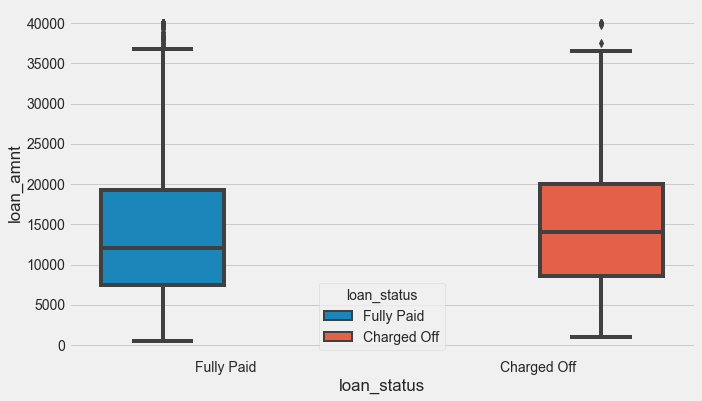

In [11]:
plt.figure(figsize =(10,6))
sns.boxplot(x = 'loan_status', y='loan_amnt',data = loan, hue = 'loan_status')

# Charged Off status has a larger loan_amount mean than Fully Paid status.

In [12]:
# Descriptive Summary by loan_status
loan['loan_amnt'].groupby(loan['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<AxesSubplot:xlabel='loan_status', ylabel='count'>

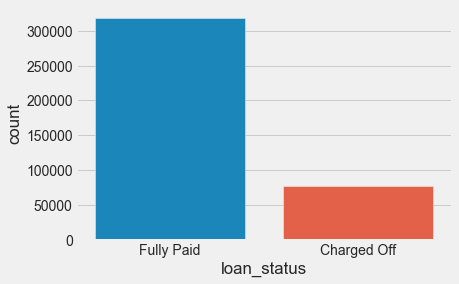

In [13]:
sns.countplot(x='loan_status',data=loan)

# Looking at the countplot, we can see that the dataset has a lot more "Fully Paid" Status than "Charged Off" Status

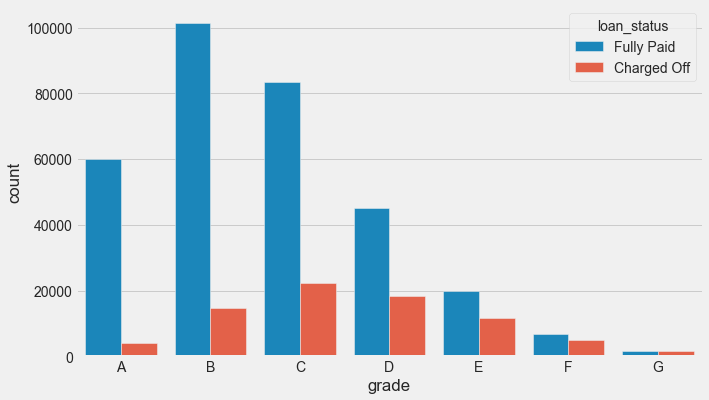

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'grade' , data = loan.sort_values(by = 'grade'), hue = 'loan_status')
plt.show()

# Based on the countplot, we can see that most of the grade has alot more Fully Paid status.
# But, for the F and G grade, it seems that the loan_status is balanced.

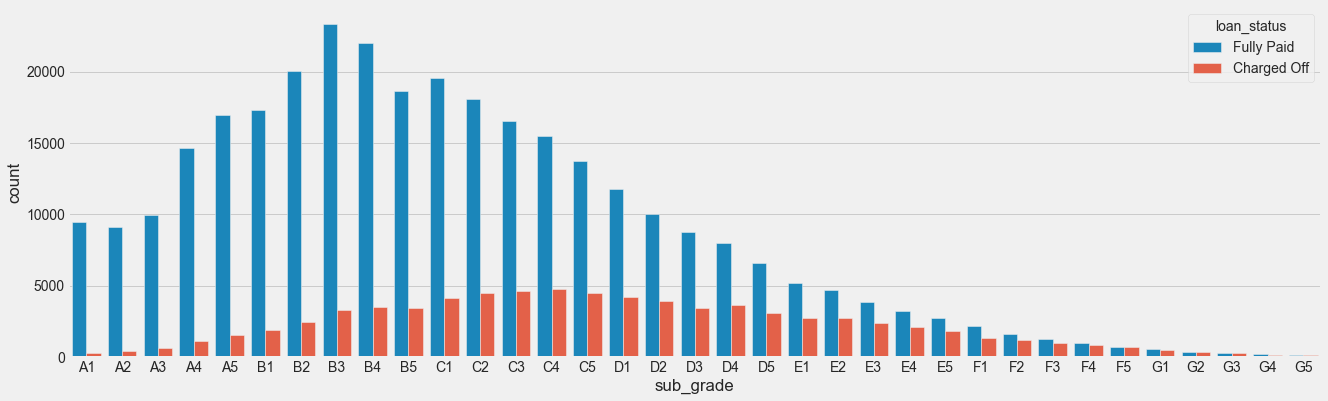

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'sub_grade' , data = loan.sort_values(by='sub_grade'), hue = 'loan_status')
plt.show()

# Based on the countplot, we can see that F and G subgrade has a "balanced" loan_status.
# We will try to explore on that

In [16]:
# Creating a dataframe where it consist only the E and F grade
subgrade_fg = loan.loc[(loan['grade'] == 'G') | (loan['grade'] == 'F')]

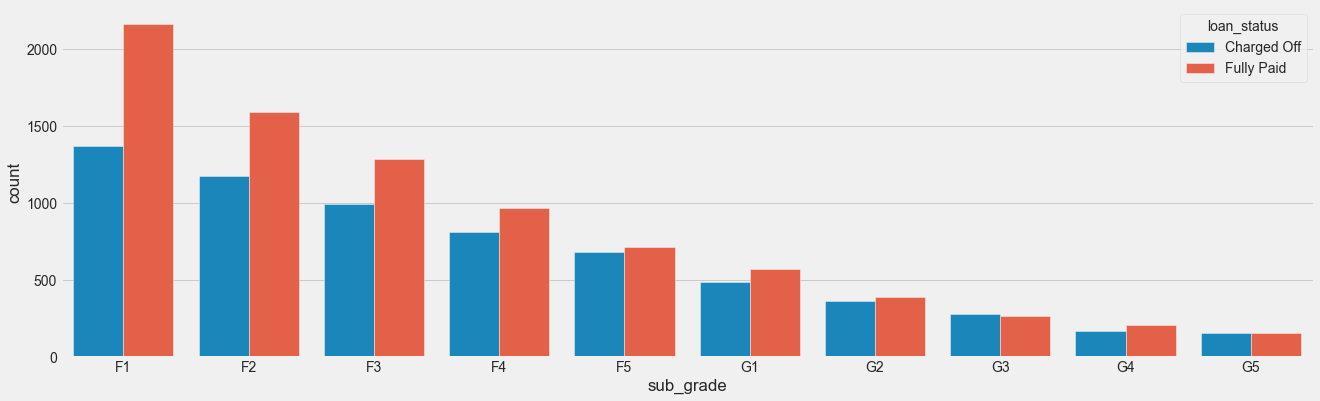

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'sub_grade' , data = subgrade_fg.sort_values(by='sub_grade'), hue = 'loan_status')
plt.show()

# Based on the countplot, both the loan_status has a trend of going down the greater (or lower) the subgrade is.
# And most of the time the subgrade has a larger Fully Paid status

In [18]:
# For simplicity we will rename our load_status column into load_repaid
# load_repaid column consist of 1 if load_status is Fully Paid, Else 0

loan['load_repaid'] = loan['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [19]:
loan[['load_repaid','loan_status']]

,load_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

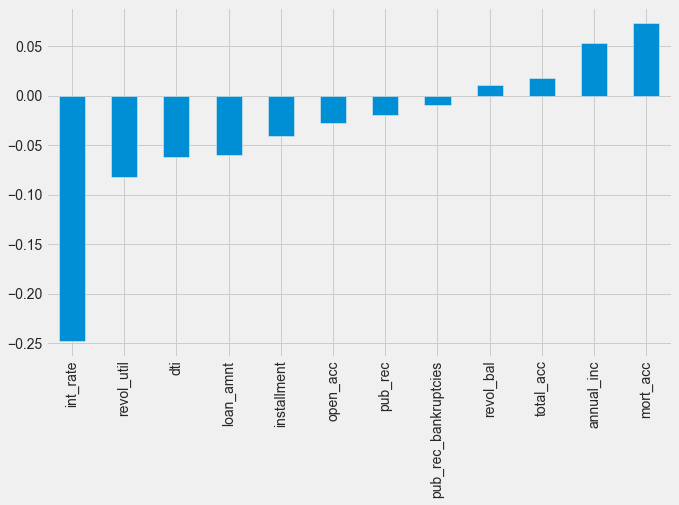

In [20]:
# Creating a barplot of correlation between load_repaid and other numeric features.

plt.figure(figsize=(10,6))
loan.corr()['load_repaid'].drop('load_repaid').sort_values().plot(kind = 'bar')

In [21]:
# Based on the data we have, the amount of INDIVIDUAL application_type is a lot larger than JOINT and DIRECT_PAY
# Lets try to explore a bit on JOINT and DIRECT_PAY
loan['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [22]:
loan_jd = loan.loc[(loan['application_type'] == 'JOINT') | (loan['application_type'] == 'DIRECT_PAY')]

<AxesSubplot:xlabel='application_type', ylabel='count'>

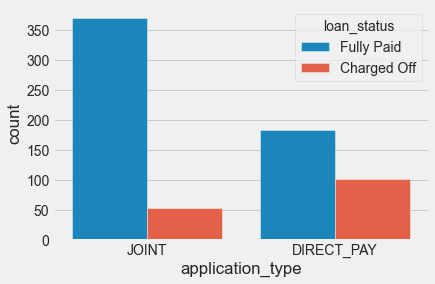

In [23]:
sns.countplot(x = 'application_type', data = loan_jd, hue = 'loan_status')

# We can see that JOINT application type doesn't have a well balance of loan_status
# While the DIRECT_PAY doesn't have a well balance of loan_status, the difference between loan_status isn't that big

# Data Cleaning

In [24]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,load_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [25]:
# Is there any null values on this dataset ?
loan.isnull().sum()

# The answer is yes.

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
load_repaid                 0
dtype: int64

In [26]:
# How many null values percolumn in percetage?

loan.isnull().sum()/loan.shape[0]

# Note that loan.shape[0] is how many rows does our dataset have, so its basically the total amount of data we have.
# There are so little null values on revol_util,title, and pub_rec_bankruptcies
# Lets try to explore all the null values one by one

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
load_repaid             0.000000
dtype: float64

In [27]:
# Emp Title
desc_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [28]:
loan['emp_title'].value_counts()

Teacher                              4389
Manager                              4250
Registered Nurse                     1856
RN                                   1846
Supervisor                           1830
                                     ... 
Valeo Engine Cooling                    1
Supply Chain Ldr                        1
CT tecnology                            1
Davis Miles                             1
Vice President - Retirement Sales       1
Name: emp_title, Length: 173105, dtype: int64

In [29]:
# Since there are too many employee title, we can't use dummy variable since there will be to many
# So lets drop the employee_title variable
loan = loan.drop('emp_title',axis = 1)

In [30]:
# Emp Length
desc_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [31]:
loan['emp_length'].sort_values().value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [32]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

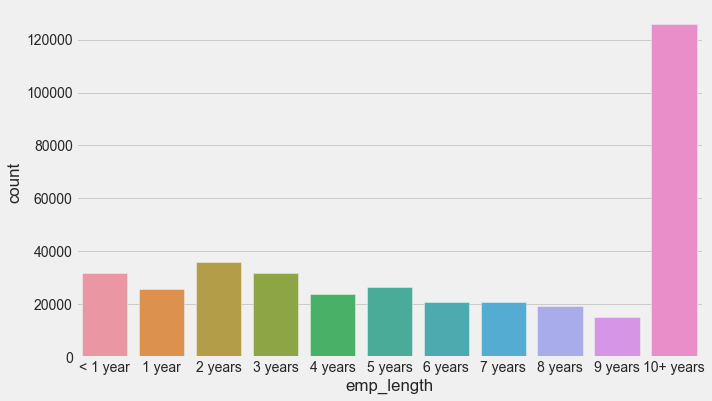

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'emp_length', data = loan, order = emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

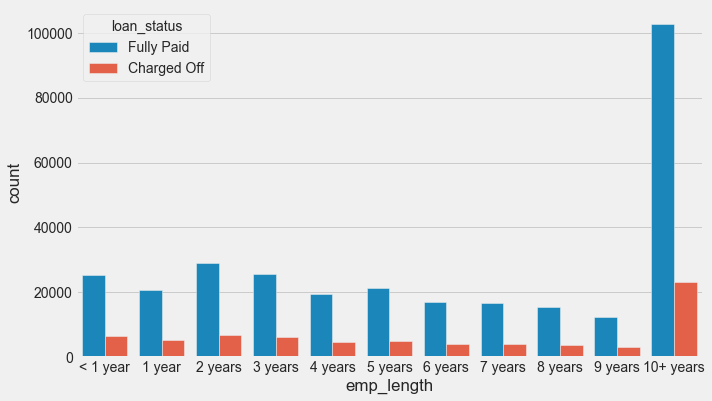

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'emp_length', data = loan, order = emp_length_order, hue = 'loan_status')

In [35]:
# We want to create a variable that could give us a relationship between emp_length and loan_status
# In order to do that we can see the ratio between Charged Off and Fully Paid

emp_co = loan[loan['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
emp_fp = loan[loan['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [36]:
emp_len = emp_co/emp_fp

<AxesSubplot:xlabel='emp_length'>

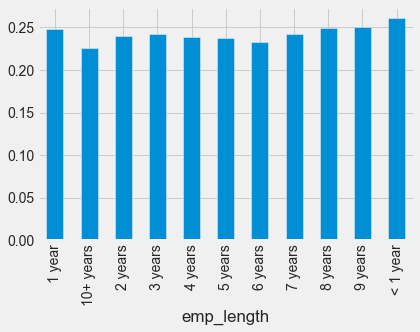

In [37]:
emp_len.plot(kind = 'bar')

In [38]:
# Based on the barplot above, we can see that the ratio between Charged Off and Fully Paid
# Is the same accross emp_length, which means we can drop the emp_length column since there are no trend or patterns

loan = loan.drop('emp_length', axis = 1)

In [39]:
# Title
loan['title'].value_counts()

Debt consolidation              152472
Credit card refinancing          51487
Home improvement                 15264
Other                            12930
Debt Consolidation               11608
                                 ...  
myne                                 1
credit card/home improvement         1
Consolidation for our future         1
fresh start to new year              1
consolidating cc debt                1
Name: title, Length: 48817, dtype: int64

In [40]:
loan['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

In [41]:
# It seems that the title column is a subcategory for the purpose column
# So we can just drop the title column

loan = loan.drop('title',axis = 1)

In [42]:
loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
load_repaid                 0
dtype: int64

In [43]:
# mort_acc
desc_info('mort_acc')

Number of mortgage accounts.


In [44]:
loan['mort_acc'].value_counts().head(5)

0.0    139777
1.0     60416
2.0     49948
3.0     38049
4.0     27887
Name: mort_acc, dtype: int64

In [45]:
# Which features correlate the most with mort_acc

loan.corr()['mort_acc'].sort_values()

# It seems total_acc correlate the most with mort_acc which makes sense

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
load_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [46]:
total_acc_avg = loan.groupby('total_acc').mean()['mort_acc']
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

# The function is to see if the mort_acc is NaN, then it will fill it in with the total_acc_avg correspond to the mort_acc
# Else it will return mort_acc

In [47]:
total_acc_avg = loan.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [48]:
loan['mort_acc'] = loan.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [49]:
loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
load_repaid               0
dtype: int64

In [50]:
# Since revol_util and pub_rec_bankruptcies null value is less than 0.05%
# we can just drop the na value
loan = loan.dropna()

In [51]:
loan.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
load_repaid             0
dtype: int64

# Feature Engineering
Now that we are done with the numeric feature, we will move on to the category feature.

In [52]:
loan.select_dtypes(['object']).columns

# We will explore each categorical feature

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [53]:
# term
loan['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [54]:
int(loan['term'][0][:3])

36

In [55]:
# We will change term into integer
loan['term'] = loan['term'].apply(lambda x: int(x[:3]))

In [56]:
# grade
# Since grade is a subpart of sub_grade then we can drop grade

loan = loan.drop('grade',axis = 1)

In [57]:
# sub_grade
# we will convert sub_grade into dummy variables

subgrade_dummies = pd.get_dummies(loan['sub_grade'],drop_first = True)
loan = pd.concat([loan.drop('sub_grade',axis = 1), subgrade_dummies],axis = 1)

In [58]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'load_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [59]:
# verification_status, application_type,initial_list_status,purpose
# we will convert those columns into dummy variables

dummies = pd.get_dummies(loan[['verification_status','application_type','initial_list_status','purpose']],drop_first = True)
loan = loan.drop(['verification_status','application_type','initial_list_status','purpose'],axis = 1)
loan = pd.concat([loan,dummies],axis = 1)

In [60]:
# home_ownership
loan['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [61]:
# we will create a dummy variable but first we need to replace NONE and ANY into OTHER
loan['home_ownership']=loan['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [62]:
dummies = pd.get_dummies(loan['home_ownership'],drop_first = True)
loan = loan.drop('home_ownership', axis = 1)
loan = pd.concat([loan,dummies],axis = 1)

In [63]:
# address
# we will feature engineer a zip_code column based on the address

loan['zip_code'] = loan['address'].apply(lambda x: x[-5:])

In [64]:
loan = loan.drop('address',axis = 1)

In [65]:
# now we want to make dummy variable out of those zipcode
dummies = pd.get_dummies(loan['zip_code'],drop_first = True)
loan = loan.drop('zip_code',axis = 1)
loan = pd.concat([loan,dummies],axis = 1)

In [66]:
# issue_d
desc_info('issue_d')

The month which the loan was funded


In [67]:
loan = loan.drop('issue_d',axis = 1)

In [68]:
# earliest_cr_line
# we will create a column where it consist of year from earliest_cr_line
loan['earliest_cr_year'] = loan['earliest_cr_line'].apply(lambda x : int(x[-4:]))
loan = loan.drop('earliest_cr_line',axis = 1)

In [91]:
loan.shape

(395219, 79)

# Model Evalution
This sections include :
 - Train Test Split
 - Modelling
 - Evaluating the model

## Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# we will drop our loan_status column since its the same as load_repaid column
loan = loan.drop('loan_status',axis = 1)

In [71]:
X = loan.drop('load_repaid',axis = 1).values
y = loan['load_repaid'].values

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [73]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()

In [75]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [92]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [79]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
1236/1236 [==============================] - 7s 4ms/step - loss: 0.3019 - val_loss: 0.2643
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2659 - val_loss: 0.2632
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2633 - val_loss: 0.2622
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2621 - val_loss: 0.2621
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2612 - val_loss: 0.2616
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2607 - val_loss: 0.2620
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2602 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2598 - val_loss: 0.2612
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2592 - val_loss: 0.2617
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.259

In [80]:
losses = pd.DataFrame(model.history.history)

In [81]:
losses

,loss,val_loss
0,0.301916,0.264314
1,0.265947,0.263155
2,0.263309,0.262215
3,0.262058,0.262081
4,0.261164,0.261568
5,0.260739,0.262006
6,0.260235,0.261744
7,0.259817,0.261239
8,0.259221,0.261688
9,0.259231,0.261104


<AxesSubplot:>

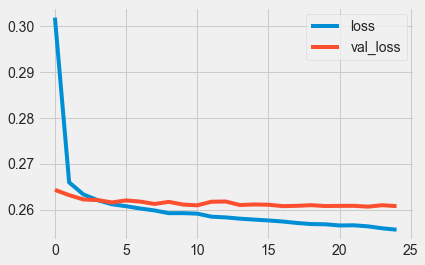

In [82]:
losses[['loss','val_loss']].plot()

# Model Evaluation

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [98]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 3s 1ms/step


In [99]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.19      0.69      0.30     15658
           1       0.78      0.27      0.40     63386

    accuracy                           0.35     79044
   macro avg       0.48      0.48      0.35     79044
weighted avg       0.66      0.35      0.38     79044

